<a href="https://colab.research.google.com/github/Meshva-p/suicide_analysis/blob/main/sui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHO DATA 1985 - 2016 
DATASET LINK - 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/sample data/master.csv')

In [ ]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [ ]:
list(df.columns)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [ ]:
df['suicides_no'].max()

22338

In [ ]:
df.iloc[22338]

country                   Seychelles
year                            2010
sex                             male
age                      55-74 years
suicides_no                        0
population                      4827
suicides/100k pop                  0
country-year          Seychelles2010
HDI for year                   0.743
 gdp_for_year ($)        969,936,525
gdp_per_capita ($)             11563
generation                    Silent
Name: 22338, dtype: object

In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

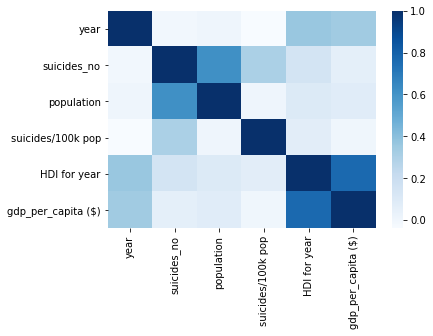

In [ ]:
corr=df.corr()
ax = sns.heatmap(corr,cmap="Blues")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


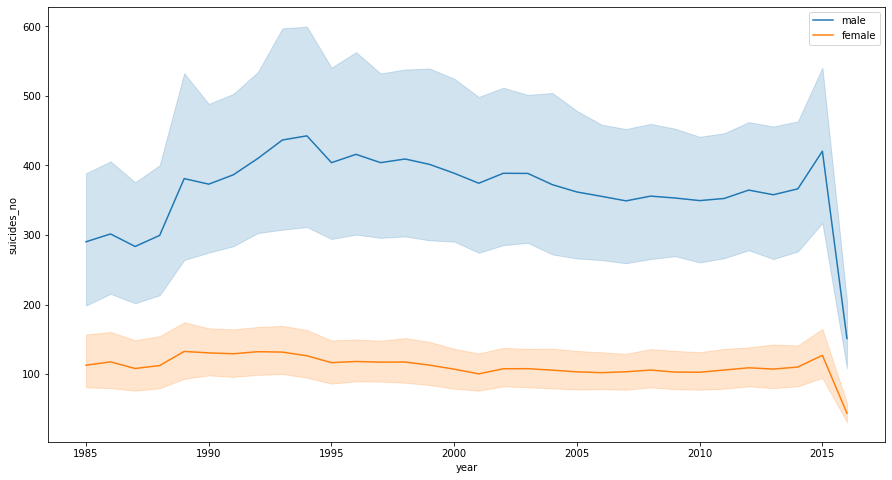

In [ ]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
plt.figure(figsize=(15,8))
sns.lineplot(df_men.year, df.suicides_no)
sns.lineplot(df_women.year, df.suicides_no)
plt.legend(["male", 'female'])
plt.show()

Text(0.5, 0, 'Suicides per 100K')

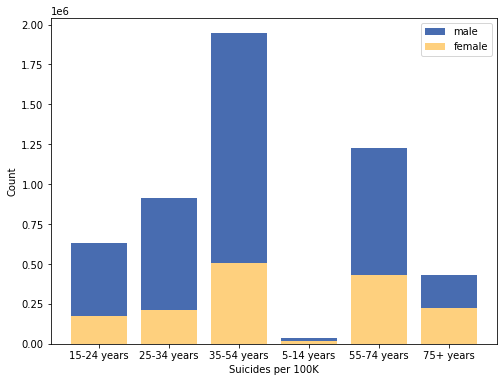

In [ ]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'])
plt.ylabel('Count')
plt.xlabel('Suicides per 100K')

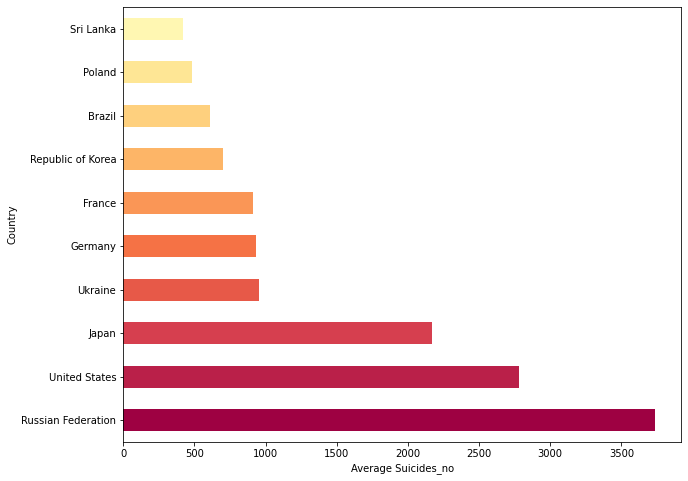

In [ ]:
plt.figure(figsize=(10, 8))

df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no')
plt.ylabel('Country');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


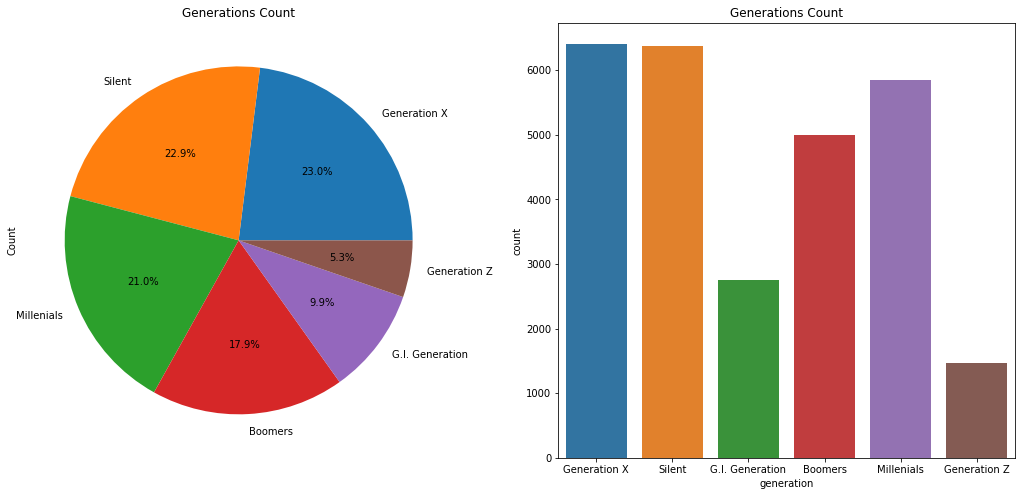

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['generation'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('generation',data=df,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="gdp_per_capita ($)", y="suicides_no", animation_frame="year", animation_group="age",size="suicides/100k pop",
           color="country", hover_name="age",
           log_x=True,range_x=[10,25000], range_y=[1,25000])

fig["layout"].pop("updatemenus") 
fig.show()


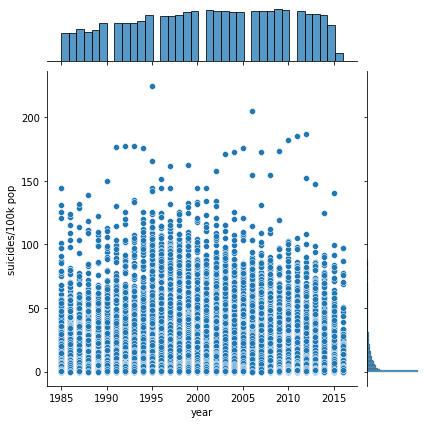

<Figure size 1440x1440 with 0 Axes>

In [ ]:

fig=sns.jointplot(y='suicides/100k pop',x='year',data=df)
plt.figure(figsize=(20,20))
plt.show()

<Figure size 2880x1440 with 0 Axes>

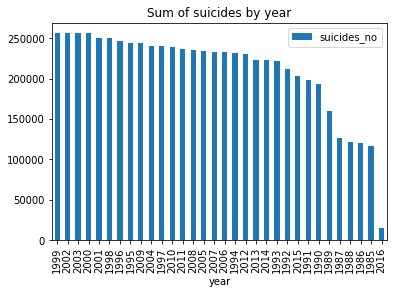

<Figure size 2880x1440 with 0 Axes>

In [ ]:
df.groupby('year').sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by year')
plt.figure(figsize=(40,20))

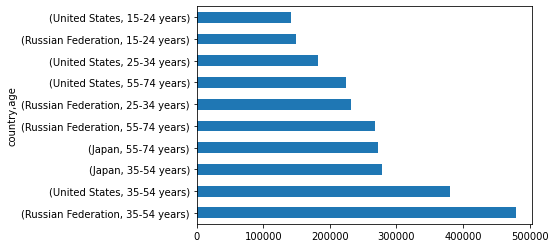

In [ ]:
df.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

<Figure size 2880x1440 with 0 Axes>

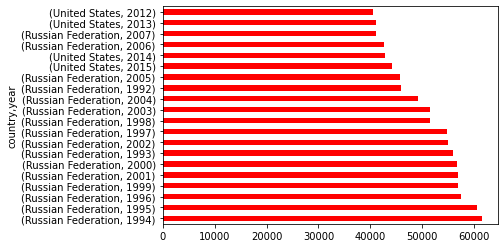

<Figure size 2880x1440 with 0 Axes>

In [ ]:
df.groupby(['country','year']).suicides_no.sum().nlargest(20).plot(kind='barh',color ='red')
plt.figure(figsize=(40,20))

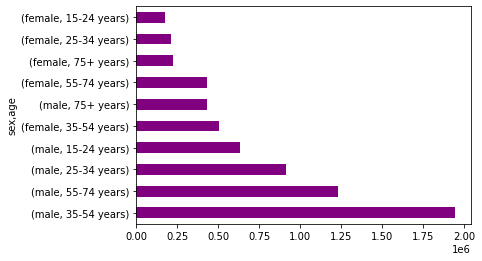

In [ ]:
df.groupby(['sex','age']).suicides_no.sum().nlargest(10).plot(kind='barh', color='purple')

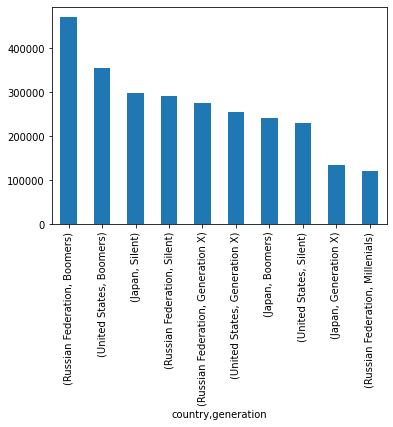

In [ ]:
df.groupby(['country','generation']).suicides_no.sum().nlargest(10).plot(kind='bar')